# Treinamento de modelo para problema do Titanic no Kaggle

In [754]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import numpy as np
import math
from sklearn.metrics import classification_report

In [755]:
df = pd.read_csv('data/train.csv')
pd.set_option('display.max_rows', 50)
df.head(50)[df['Survived'] == 1]

/home/felipe/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


PassengerId  Survived  Pclass  \
1             2         1       1   
2             3         1       3   
3             4         1       1   
8             9         1       3   
9            10         1       2   
10           11         1       3   
11           12         1       1   
15           16         1       2   
17           18         1       2   
19           20         1       3   
21           22         1       2   
22           23         1       3   
23           24         1       1   
25           26         1       3   
28           29         1       3   
31           32         1       1   
32           33         1       3   
36           37         1       3   
39           40         1       3   
43           44         1       2   
44           45         1       3   
47           48         1       3   

                                                 Name     Sex   Age  SibSp  \
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                              Heikkinen, Miss. Laina  female  26.0      0   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
8   Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                 Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
10                    Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                           Bonnell, Miss. Elizabeth  female  58.0      0   
15                   Hewlett, Mrs. (Mary D Kingcome)   female  55.0      0   
17                       Williams, Mr. Charles Eugene    male   NaN      0   
19                            Masselmani, Mrs. Fatima  female   NaN      0   
21                              Beesley, Mr. Lawrence    male  34.0      0   
22                        McGowan, Miss. Anna "Annie"  female  15.0      0   
23                       Sloper, Mr. William Thompson    male  28.0      0   
25  Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...  female  38.0      1   
28                      O'Dwyer, Miss. Ellen "Nellie"  female   NaN      0   
31     Spencer, Mrs. William Augustus (Marie Eugenie)  female   NaN      1   
32                           Glynn, Miss. Mary Agatha  female   NaN      0   
36                                   Mamee, Mr. Hanna    male   NaN      0   
39                        Nicola-Yarred, Miss. Jamila  female  14.0      1   
43           Laroche, Miss. Simonne Marie Anne Andree  female   3.0      1   
44                      Devaney, Miss. Margaret Delia  female  19.0      0   
47                          O'Driscoll, Miss. Bridget  female   NaN      0   

    Parch            Ticket      Fare Cabin Embarked  
1       0          PC 17599   71.2833   C85        C  
2       0  STON/O2. 3101282    7.9250   NaN        S  
3       0            113803   53.1000  C123        S  
8       2            347742   11.1333   NaN        S  
9       0            237736   30.0708   NaN        C  
10      1           PP 9549   16.7000    G6        S  
11      0            113783   26.5500  C103        S  
15      0            248706   16.0000   NaN        S  
17      0            244373   13.0000   NaN        S  
19      0              2649    7.2250   NaN        C  
21      0            248698   13.0000   D56        S  
22      0            330923    8.0292   NaN        Q  
23      0            113788   35.5000    A6        S  
25      5            347077   31.3875   NaN        S  
28      0            330959    7.8792   NaN        Q  
31      0          PC 17569  146.5208   B78        C  
32      0            335677    7.7500   NaN        Q  
36      0              2677    7.2292   NaN        C  
39      0              2651   11.2417   NaN        C  
43      2     SC/Paris 2123   41.5792   NaN        C  
44      0            330958    7.8792   NaN        Q  
47      0             14311    7.7500   NaN        Q

In [701]:
df[df['Survived'] == 1].groupby('Sex').size()

Sex
female    233
male      109
dtype: int64

In [702]:
df[df['Survived'] == 1].groupby('Embarked').size()

Embarked
C     93
Q     30
S    217
dtype: int64

In [703]:
mean_age_of_survivors = df[df['Survived'] == 1]['Age'].mean()
mean_age_of_survivors

28.343689655172415

In [704]:
mean_age_of_dead = df[df['Survived'] == 0]['Age'].mean()
mean_age_of_dead

30.62617924528302

In [705]:
mean_fare_of_survivors = df[df['Survived'] == 1]['Fare'].mean()
mean_fare_of_survivors

48.39540760233918

In [706]:
mean_fare_of_dead = df[df['Survived'] == 0]['Fare'].mean()
mean_fare_of_dead

22.117886885245902

In [707]:
y = df['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [708]:
#df[['PassengerId', 'Survived', 'Age', 'Parch']]
#df[df['Parch'] > 0]
#df[df['Parch'] > 0][['PassengerId', 'Survived', 'Age', 'Parch']].head(50)
df[(df['Parch'] >= 0) & (df['Age'] < 13)].groupby('Survived').size()

Survived
0    29
1    40
dtype: int64

In [709]:
df[(df['Parch'] >= 0) & (df['Age'] >= 65)].groupby('Survived').size()

Survived
0    10
1     1
dtype: int64

In [710]:
df.corr()

PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000

In [711]:
np.sum(y) / len(y)

0.3838383838383838

In [712]:
# axis = 0: rows, axis = 1: columns
#X = df.drop('Survived', axis = 1)
#X['Age'] = X['Age'].fillna(0)
#X[X['Age'] == 0]
df['Age'].median()

28.0

<AxesSubplot:xlabel='Survived', ylabel='Age'>

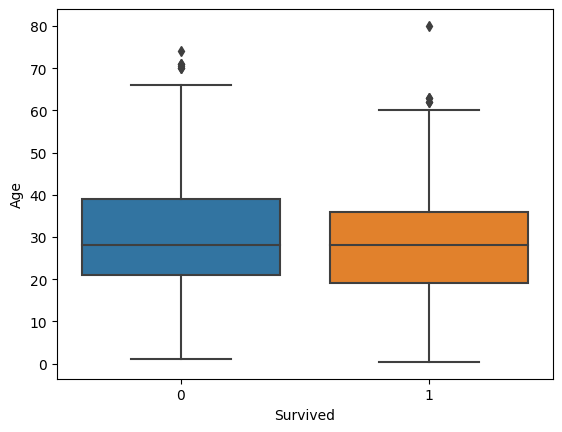

In [763]:
sns.boxplot(data=df, x='Survived', y='Age')

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

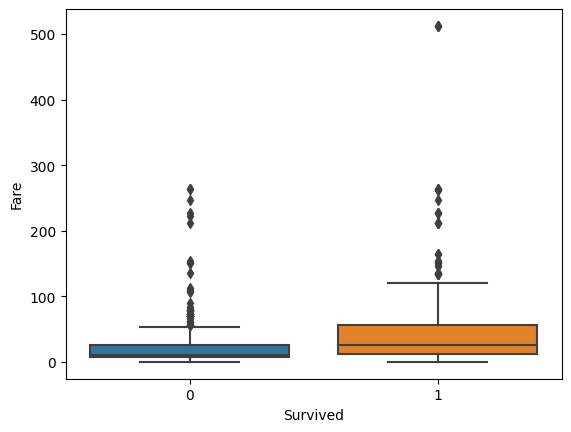

In [764]:
sns.boxplot(data=df, x='Survived', y='Fare')

In [766]:
#df['Name'].str.split(' ').str[0]
#df.loc[df['Age'] < 1, 'Age'] = 0
#df.loc[df['Age'] < 1]
#df[(df['Parch'] >= 0) & (df['Age'] <= 1)].groupby('Survived').size()
#df[(df['Age'] > 30)]['PassengerId'].count()
pclass_factor = {
        1: 50,
        2: 15,
        3: 5
}
age_limit = 65
df[(df['Age'] > age_limit)].groupby('Survived').size() / df[(df['Age'] > age_limit)]['PassengerId'].count()

Survived
0    0.875
1    0.125
dtype: float64

In [765]:
def fare_times_p_class_factor(pclass):
    pclass_factor = {
        1: 25,
        2: 10,
        3: 5
    }
    return pclass_factor[pclass]
    

In [734]:
def preprocess_titanic_dataframe(cur_df):
    cur_df.loc[cur_df['Age'] < 1, 'Age'] = 0
    cur_df['Age'] = cur_df['Age'].fillna(cur_df['Age'].median())
    cur_df['Cabin'] = cur_df['Cabin'].fillna('Unknown')
    cur_df['Cabin_1st_letter'] = cur_df['Cabin'].str[0] # Cabin unknown is correlated with no Survives
    cur_df['Cabin_last_letter'] = cur_df['Cabin'].str[-1] # Cabin unknown is correlated with no Surives, using only one
    cur_df['Family_size'] = cur_df['SibSp'] + cur_df['Parch'] + 1# Low correlation
    cur_df['Concern_for_family'] = cur_df['SibSp'] * cur_df['Parch'] # Low correlation
    cur_df = cur_df.assign(Is_Baby = (cur_df['Age'] <= 1).values)
    cur_df = cur_df.assign(Is_Child = (cur_df['Age'] > 1) & (cur_df['Age'] < 12))
    cur_df = cur_df.assign(Is_Old = (cur_df['Age'] >= 65).values)
    cur_df = cur_df.assign(SibSp_Squared = cur_df['SibSp'] * cur_df['SibSp']) # Low Correlation
    cur_df = cur_df.assign(Parch_Squared = cur_df['Parch'] * cur_df['Parch']) # Low Correlation
    
    cur_df['Surname'] = cur_df['Name'].str.split(' ').str[0]
    cur_df['Surname_1st_letter'] = cur_df['Surname'].str[0]
    cur_df = cur_df.assign(Treatment_Pronoun = cur_df['Name'].str.extract(r"(Mr\.|Mrs\.|Miss\.|Ms\.|Rev\.|Master\.|Don\.|Dr\.|Mme\.|Major\.|Mlle\.|Sir\.|Col\.|Capt\.|Countess\.|Jonkheer\.)"))
    cur_df = cur_df.assign(Wage_Per_Person = cur_df['Fare'] / (1 + cur_df['SibSp'] + cur_df['Parch']))
    cur_df = cur_df.assign(Name_Size = cur_df['Name'].str.len())
    cur_df = cur_df.assign(Patrimony = (cur_df['Fare'] * cur_df['Pclass'].apply(fare_times_p_class_factor)) / cur_df['Family_size'])

    # Other tests that were done
    #cur_df = cur_df.assign(Fare_Squared_By_Age = cur_df['Fare_Squared'] / cur_df['Age'])
    #cur_df = cur_df.assign(Portion_Life = cur_df['Age'] / 40)
    #cur_df = cur_df.assign(FareToThird = cur_df['Fare'] * cur_df['Fare'] * cur_df['Fare'])
    #cur_df = cur_df.assign(IsYoungEnough = cur_df['Age'] <= mean_age_of_survivors)
    #cur_df = cur_df.assign(IsTooOld = cur_df['Age'] > mean_age_of_dead)
    #cur_df = cur_df.assign(IsRichEnough = cur_df['Fare'] > mean_fare_of_survivors)
    #cur_df.corr()
    # are these important? 'Name_Size', 'Is_Baby', 'Is_Child', 'Is_Old'? For train/test no, For generalization, yes.
    #X = cur_df[['Surname']]
    #X = cur_df[['Pclass', 'Sex', 'Embarked', 'Cabin', 'Treatment_Pronoun', 'Is_Baby', 'Is_Child', 'Age']]
    #newest X = cur_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked', 'Cabin_1st_letter', 'Cabin_last_letter', 'Family_size', 'Treatment_Pronoun']]
    #X = cur_df[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Cabin_1st_letter', 'Cabin_last_letter', 'Treatment_Pronoun', 'Name_Size', 'Family_size', 'Wage_Per_Person']]
    #X = cur_df[['Pclass', 'Sex', 'SibSp', 'Fare', 'Embarked', 'Cabin', 'Wage_Per_Person', 'Fare_Squared', 'Treatment_Pronoun']]
    #X = cur_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Cabin', 'SibSp * Parch', 'Fare', 'Tratment_Pronoun']]
    
    X = cur_df[['Pclass', 'Sex', 'Embarked', 'Cabin_1st_letter', 'Treatment_Pronoun', 'Fare', 'Surname_1st_letter', 'Name_Size', 'Is_Baby', 'Is_Child', 'Is_Old']]
    X = pd.get_dummies(X)
    scaler = MinMaxScaler()
    # transform data
    scaled = scaler.fit_transform(X)
    X = pd.DataFrame(scaled, columns=X.columns)
    final_X = X
    final_X
    #cur_df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
    return final_X


In [735]:
final_X = preprocess_titanic_dataframe(df)
final_X.head(20)

Pclass      Fare  Name_Size  Is_Baby  Is_Child  Is_Old  Sex_female  \
0      1.0  0.014151   0.157143      0.0       0.0     0.0         0.0   
1      0.0  0.139136   0.557143      0.0       0.0     0.0         1.0   
2      1.0  0.015469   0.142857      0.0       0.0     0.0         1.0   
3      0.0  0.103644   0.457143      0.0       0.0     0.0         1.0   
4      1.0  0.015713   0.171429      0.0       0.0     0.0         0.0   
5      1.0  0.016510   0.057143      0.0       0.0     0.0         0.0   
6      0.0  0.101229   0.157143      0.0       0.0     0.0         0.0   
7      1.0  0.041136   0.257143      0.0       1.0     0.0         0.0   
8      1.0  0.021731   0.528571      0.0       0.0     0.0         1.0   
9      0.5  0.058694   0.328571      0.0       0.0     0.0         1.0   
10     1.0  0.032596   0.271429      0.0       1.0     0.0         1.0   
11     0.0  0.051822   0.171429      0.0       0.0     0.0         1.0   
12     1.0  0.015713   0.257143      0.0       0.0     0.0         0.0   
13     1.0  0.061045   0.214286      0.0       0.0     0.0         0.0   
14     1.0  0.015330   0.342857      0.0       0.0     0.0         1.0   
15     0.5  0.031230   0.285714      0.0       0.0     0.0         1.0   
16     1.0  0.056848   0.114286      0.0       1.0     0.0         0.0   
17     0.5  0.025374   0.228571      0.0       0.0     0.0         0.0   
18     1.0  0.035134   0.614286      0.0       0.0     0.0         1.0   
19     1.0  0.014102   0.157143      0.0       0.0     0.0         1.0   

    Sex_male  Embarked_C  Embarked_Q  ...  Surname_1st_letter_R  \
0        1.0         0.0         0.0  ...                   0.0   
1        0.0         1.0         0.0  ...                   0.0   
2        0.0         0.0         0.0  ...                   0.0   
3        0.0         0.0         0.0  ...                   0.0   
4        1.0         0.0         0.0  ...                   0.0   
5        1.0         0.0         1.0  ...                   0.0   
6        1.0         0.0         0.0  ...                   0.0   
7        1.0         0.0         0.0  ...                   0.0   
8        0.0         0.0         0.0  ...                   0.0   
9        0.0         1.0         0.0  ...                   0.0   
10       0.0         0.0         0.0  ...                   0.0   
11       0.0         0.0         0.0  ...                   0.0   
12       1.0         0.0         0.0  ...                   0.0   
13       1.0         0.0         0.0  ...                   0.0   
14       0.0         0.0         0.0  ...                   0.0   
15       0.0         0.0         0.0  ...                   0.0   
16       1.0         0.0         1.0  ...                   1.0   
17       1.0         0.0         0.0  ...                   0.0   
18       0.0         0.0         0.0  ...                   0.0   
19       0.0         1.0         0.0  ...                   0.0   

    Surname_1st_letter_S  Surname_1st_letter_T  Surname_1st_letter_U  \
0                    0.0                   0.0                   0.0   
1                    0.0                   0.0                   0.0   
2                    0.0                   0.0                   0.0   
3                    0.0                   0.0                   0.0   
4                    0.0                   0.0                   0.0   
5                    0.0                   0.0                   0.0   
6                    0.0                   0.0                   0.0   
7                    0.0                   0.0                   0.0   
8                    0.0                   0.0                   0.0   
9                    0.0                   0.0                   0.0   
10                   1.0                   0.0                   0.0   
11                   0.0                   0.0                   0.0   
12                   1.0                   0.0                   0.0   
13                   0.0         

<AxesSubplot:>

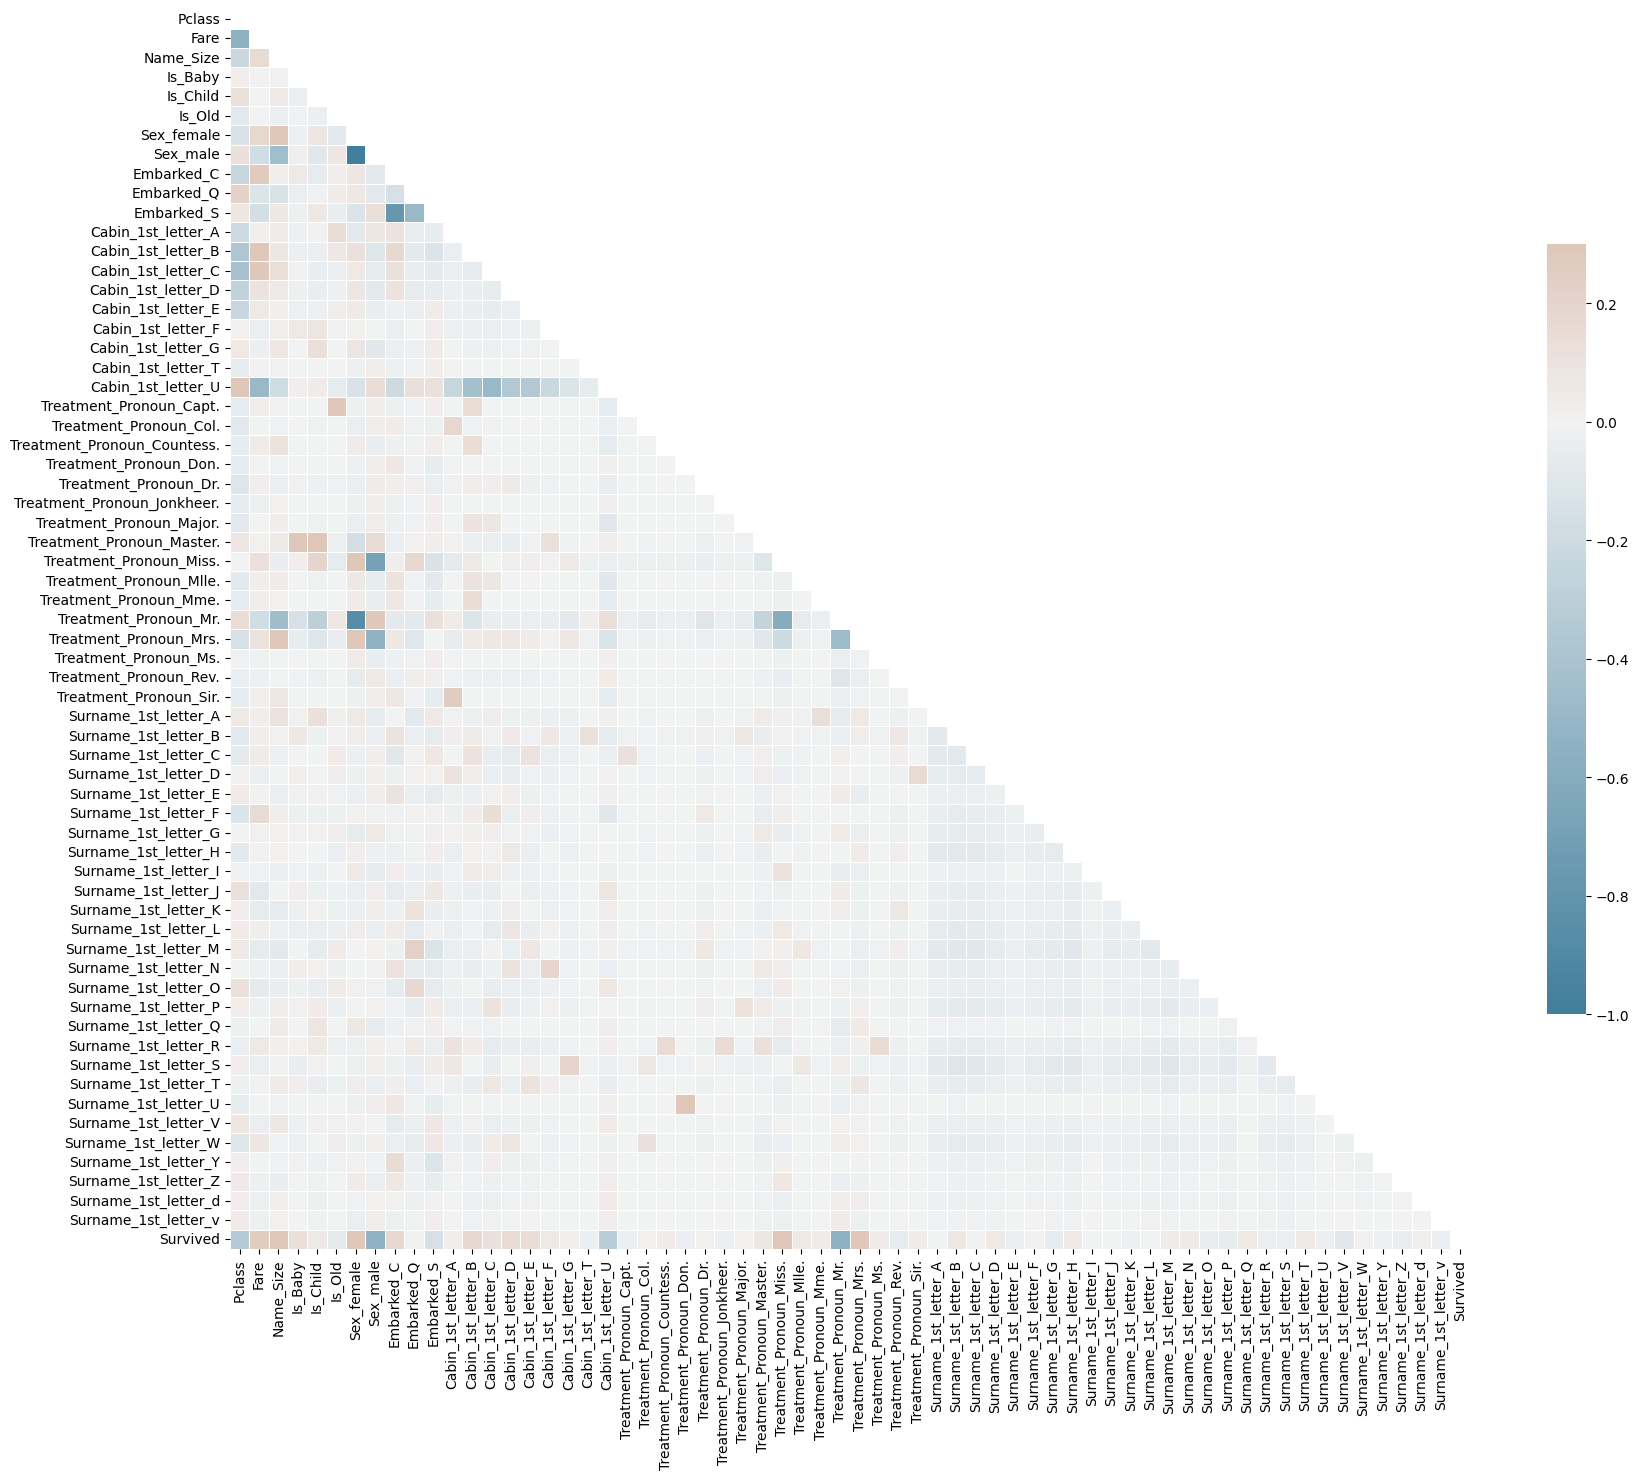

In [736]:
# Gráfico para mostrar correlação entre variáveis selecionadas
temp_X = final_X
temp_X = temp_X.assign(Survived = y)
corr = temp_X.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

cmap = sns.diverging_palette(230, 30, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [737]:
X_train, X_test, y_train, y_test = train_test_split(final_X, y, test_size=0.2, random_state=42)

In [738]:
#clf = LogisticRegression(random_state = 0) 
#clf = GaussianNB()
#clf = RandomForestClassifier(max_depth = 18, random_state = 0) 
clf = RandomForestClassifier(max_depth = 20, random_state = 0) 
#clf = MLPClassifier(solver='lbfgs', alpha=1e-6, hidden_layer_sizes=(50, 50), random_state=1) 
#clf = SVC(gamma = 'auto')
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, random_state=0)

In [739]:
y_predicted = clf.predict(X_test)

In [740]:
clf.score(X_train, y_train)

0.9747191011235955

In [741]:
clf.score(X_test, y_test)

0.8212290502793296

In [743]:
# Relatóro mais completo sobre precisão do modelo
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [744]:
test_df = pd.read_csv('data/test.csv')

In [745]:
test_df.head(100)

PassengerId  Pclass                                               Name  \
0           892       3                                   Kelly, Mr. James   
1           893       3                   Wilkes, Mrs. James (Ellen Needs)   
2           894       2                          Myles, Mr. Thomas Francis   
3           895       3                                   Wirz, Mr. Albert   
4           896       3       Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..          ...     ...                                                ...   
95          987       3                         Tenglin, Mr. Gunnar Isidor   
96          988       1  Cavendish, Mrs. Tyrell William (Julia Florence...   
97          989       3                          Makinen, Mr. Kalle Edvard   
98          990       3                       Braf, Miss. Elin Ester Maria   
99          991       3                       Nancarrow, Mr. William Henry   

       Sex   Age  SibSp  Parch             Ticket     Fare Cabin Embarked  
0     male  34.5      0      0             330911   7.8292   NaN        Q  
1   female  47.0      1      0             363272   7.0000   NaN        S  
2     male  62.0      0      0             240276   9.6875   NaN        Q  
3     male  27.0      0      0             315154   8.6625   NaN        S  
4   female  22.0      1      1            3101298  12.2875   NaN        S  
..     ...   ...    ...    ...                ...      ...   ...      ...  
95    male  25.0      0      0             350033   7.7958   NaN        S  
96  female  76.0      1      0              19877  78.8500   C46        S  
97    male  29.0      0      0  STON/O 2. 3101268   7.9250   NaN        S  
98  female  20.0      0      0             347471   7.8542   NaN        S  
99    male  33.0      0      0         A./5. 3338   8.0500   NaN        S  

[100 rows x 11 columns]

In [746]:
# Correlação entre variáveis
corr_df = final_X.assign(Survived = y)
corr_df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

Pclass      Fare  Name_Size   Is_Baby  Is_Child  \
Pclass                1.000000  0.079498   0.061149  0.020593 -0.049397   
Fare                  0.079498  1.000000  -0.001779  0.085787 -0.026619   
Name_Size             0.061149 -0.001779   1.000000 -0.037524  0.010343   
Is_Baby               0.020593  0.085787  -0.037524  1.000000 -0.032092   
Is_Child             -0.049397 -0.026619   0.010343 -0.032092  1.000000   
...                        ...       ...        ...       ...       ...   
Surname_1st_letter_Y -0.025258 -0.032190   0.031367 -0.011243 -0.022603   
Surname_1st_letter_Z -0.047664  0.014798   0.014073 -0.007344 -0.014763   
Surname_1st_letter_d -0.013060  0.011583  -0.026144 -0.008485 -0.017057   
Surname_1st_letter_v -0.038895 -0.004564  -0.034322 -0.005993 -0.012048   
Survived              0.247845  0.191981   0.032894  0.122966  0.060670   

                        Is_Old  Sex_female  Sex_male  Embarked_C  Embarked_Q  \
Pclass                0.035480    0.118133  0.118133    0.031898   -0.212234   
Fare                  0.010559    0.137725  0.137725    0.166756   -0.029329   
Name_Size            -0.045113    0.103287  0.103287   -0.020387   -0.031168   
Is_Baby              -0.014126   -0.017640 -0.017640    0.054457   -0.038860   
Is_Child             -0.028398    0.088317  0.088317   -0.062313   -0.011160   
...                        ...         ...       ...         ...         ...   
Surname_1st_letter_Y -0.009949    0.014186  0.014186    0.152103   -0.027369   
Surname_1st_letter_Z -0.006498    0.038235  0.038235    0.071046   -0.017877   
Surname_1st_letter_d -0.007508   -0.014396 -0.014396    0.010549   -0.020654   
Surname_1st_letter_v -0.005303   -0.034990 -0.034990   -0.022864   -0.014588   
Survived             -0.067344    0.543351  0.543351    0.168240    0.003650   

                      ...  Surname_1st_letter_S  Surname_1st_letter_T  \
Pclass                ...             -0.068321              0.010406   
Fare                  ...             -0.043141              0.009625   
Name_Size             ...              0.038595             -0.021365   
Is_Baby               ...             -0.041297              0.026448   
Is_Child              ...              0.012550             -0.047413   
...                   ...                   ...                   ...   
Surname_1st_letter_Y  ...             -0.029085             -0.016610   
Surname_1st_letter_Z  ...             -0.018998             -0.010850   
Surname_1st_letter_d  ...             -0.021949             -0.012535   
Surname_1st_letter_v  ...             -0.015503             -0.008854   
Survived              ...             -0.031339              0.057380   

                      Surname_1st_letter_U  Surname_1st_letter_V  \
Pclass                            0.014450             -0.088073   
Fare                             -0.024993             -0.048529   
Name_Size                        -0.040691             -0.010034   
Is_Baby                          -0.004235             -0.015374   
Is_Child                         -0.008514              0.008321   
...                                    ...                   ...   
Surname_1st_letter_Y             -0.002983             -0.010828   
Surname_1st_letter_Z             -0.001948             -0.007073   
Surname_1st_letter_d             -0.002251             -0.008171   
Surname_1st_letter_v             -0.001590             -0.005771   
Survived                         -0.026456             -0.096040   

                      Surname_1st_letter_W  Surname_1st_letter_Y  \
Pclass                        9.941254e-02             -0.025258   
Fare                         -1.909416e-02             -0.032190   
Name_Size                     6.602690e-02              0.031367   
Is_Baby                      -2.477864e-02             -0.011243   
Is_Child                     -4.309835e-18             -0.022603   
...                                    ...                  

In [747]:
X_test_final = preprocess_titanic_dataframe(test_df)

In [748]:
missing_cols = set( X_train.columns ) - set( X_test_final.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    X_test_final[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
X_test_final = X_test_final[X_train.columns]
X_test_final = X_test_final.fillna(0)
X_test_final

Pclass      Fare  Name_Size  Is_Baby  Is_Child  Is_Old  Sex_female  \
0       1.0  0.015282       0.06      0.0       0.0     0.0         0.0   
1       1.0  0.013663       0.38      0.0       0.0     0.0         1.0   
2       0.5  0.018909       0.24      0.0       0.0     0.0         0.0   
3       1.0  0.016908       0.06      0.0       0.0     0.0         0.0   
4       1.0  0.023984       0.62      0.0       0.0     0.0         1.0   
..      ...       ...        ...      ...       ...     ...         ...   
413     1.0  0.015713       0.10      0.0       0.0     0.0         0.0   
414     0.0  0.212559       0.30      0.0       0.0     0.0         1.0   
415     1.0  0.014151       0.30      0.0       0.0     0.0         0.0   
416     1.0  0.015713       0.12      0.0       0.0     0.0         0.0   
417     1.0  0.043640       0.22      0.0       0.0     0.0         0.0   

     Sex_male  Embarked_C  Embarked_Q  ...  Surname_1st_letter_R  \
0         1.0         0.0         1.0  ...                   0.0   
1         0.0         0.0         0.0  ...                   0.0   
2         1.0         0.0         1.0  ...                   0.0   
3         1.0         0.0         0.0  ...                   0.0   
4         0.0         0.0         0.0  ...                   0.0   
..        ...         ...         ...  ...                   ...   
413       1.0         0.0         0.0  ...                   0.0   
414       0.0         1.0         0.0  ...                   0.0   
415       1.0         0.0         0.0  ...                   0.0   
416       1.0         0.0         0.0  ...                   0.0   
417       1.0         1.0         0.0  ...                   0.0   

     Surname_1st_letter_S  Surname_1st_letter_T  Surname_1st_letter_U  \
0                     0.0                   0.0                     0   
1                     0.0                   0.0                     0   
2                     0.0                   0.0                     0   
3                     0.0                   0.0                     0   
4                     0.0                   0.0                     0   
..                    ...                   ...                   ...   
413                   1.0                   0.0                     0   
414                   0.0                   0.0                     0   
415                   1.0                   0.0                     0   
416                   0.0                   0.0                     0   
417                   0.0                   0.0                     0   

     Surname_1st_letter_V  Surname_1st_letter_W  Surname_1st_letter_Y  \
0                     0.0                   0.0                     0   
1                     0.0                   1.0                     0   
2                     0.0                   0.0                     0   
3                     0.0                   1.0                     0   
4                     0.0                   0.0                     0   
..                    ...                   ...                   ...   
413                   0.0                   0.0                     0   
414                   0.0                   0.0                     0   
415                   0.0                   0.0                     0   
416                   0.0                   1.0                     0   
417                   0.0                   0.0                     0   

     Surname_1st_letter_Z  Surname_1st_letter_d  Surname_1st_letter_v  
0                     0.0                   0.0                   0.0  
1                     0.0                   0.0                   0.0  
2                     0.0                   0.0                   0.0  
3                     0.0                   0.0                   0.0  
4                     0.0                   0.0                   0.0  
..                    ...                   ...                   ...  
413                   0.0    

In [749]:
y_predictions = clf.predict(X_test_final)

In [750]:
test_df['Survived'] = y_predictions

In [751]:
test_df[['PassengerId', 'Survived']].to_csv('data/test_predicted.csv', index = False)